In [1]:
import sys
from imp import reload
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/wtb2/Documents/boilerplate/')
import solvers0D as s0D
reload(s0D)
%matplotlib inline

# Boilerplate Testing

Notebook for testing boilerplate code.

## Solver Testing

Testing Euler and RK4 general purpose solvers with projectile motion ODE.

In [2]:
def projectile_derivs(s,time,tau,**kwargs):
    #s=[vx,x,vy,y]
    derivs = []
    derivs.append(0)
    derivs.append(s[0] + tau*derivs[0])
    derivs.append(kwargs['g'])
    derivs.append(s[2] + tau*derivs[2])
    return derivs

In [3]:
#Initial parameters
total_time = 3.0
tau = 0.01
state = [10.,0.,10.,5.]

In [4]:
#Instantiate solver class
solver = s0D.Solvers0D(projectile_derivs,{'g':-9.8})

First, test Euler solver.

In [5]:
#Evolve
pstate = []
pstate.append(state)
tvec = []
time = 0.
tvec.append(time)
while time < total_time:
    time += tau
    tvec.append(time)
    new_state = solver.euler_solve(state,time,tau)
    pstate.append(new_state)
    state=new_state

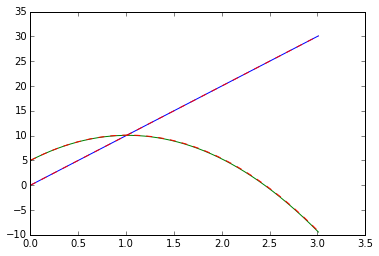

In [6]:
plt.plot(tvec,np.array(pstate)[:,1])
plt.plot(tvec,np.array(pstate)[:,3])
plt.plot(tvec,10*np.array(tvec),'--r')
plt.plot(tvec,5 + 10*np.array(tvec) - 0.5*9.8*np.array(tvec)**2,'--r')

Now, reinitialize and test RK4 solver.

In [7]:
#Initial parameters
total_time = 3.0
tau = 0.01
state = [10.,0.,10.,5.]
pstate = []
pstate.append(state)
tvec = []
time = 0.
tvec.append(time)

In [8]:
#Evolve
while time < total_time:
    time += tau
    tvec.append(time)
    new_state = solver.rk4_solve(state,time,tau)
    pstate.append(new_state)
    state=new_state

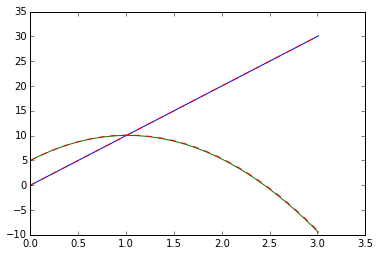

In [9]:
plt.plot(tvec,np.array(pstate)[:,1])
plt.plot(tvec,np.array(pstate)[:,3])
plt.plot(tvec,10*np.array(tvec),'--r')
plt.plot(tvec,5 + 10*np.array(tvec) - 0.5*9.8*np.array(tvec)**2,'--r')

Include test to show usefulness of RK4 over Euler as step size increases (run time does not)